In [23]:
import sys  
sys.path.insert(0, './')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Importing

In [24]:
df = pd.read_csv('../../data/prices_round_4_day_1.csv', index_col='timestamp', delimiter=';')
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,1,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3047.0,0.0
0,1,PINA_COLADAS,15013.0,34.0,15012.0,54.0,NaN,NaN,15016.0,88.0,NaN,NaN,NaN,NaN,15014.5,0.0
0,1,DIP,6999.0,237.0,NaN,NaN,NaN,NaN,7001.0,237.0,NaN,NaN,NaN,NaN,7000.0,0.0
0,1,BAGUETTE,11999.0,90.0,NaN,NaN,NaN,NaN,12001.0,90.0,NaN,NaN,NaN,NaN,12000.0,0.0
0,1,PICNIC_BASKET,73358.0,12.0,73357.0,27.0,NaN,NaN,73372.0,12.0,73373.0,27.0,NaN,NaN,73365.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999900,1,PEARLS,9995.0,20.0,NaN,NaN,NaN,NaN,10005.0,20.0,NaN,NaN,NaN,NaN,10000.0,-224.0
999900,1,COCONUTS,7922.0,178.0,NaN,NaN,NaN,NaN,7925.0,178.0,NaN,NaN,NaN,NaN,7923.5,20068.0
999900,1,BAGUETTE,12254.0,105.0,NaN,NaN,NaN,NaN,12256.0,105.0,NaN,NaN,NaN,NaN,12255.0,-1204240.0


In [25]:
df_pearls = df.loc[df['product']=='PEARLS'][['mid_price']].rename(columns={'mid_price': 'pearls'})
df_bananas = df.loc[df['product']=='BANANAS'][['mid_price']].rename(columns={'mid_price': 'bananas'})
df_pina_coladas = df.loc[df['product']=='PINA_COLADAS'][['mid_price']].rename(columns={'mid_price': 'pina_coladas'})
df_coconuts = df.loc[df['product']=='COCONUTS'][['mid_price']].rename(columns={'mid_price': 'coconuts'})
df_berries = df.loc[df['product']=='BERRIES'][['mid_price']].rename(columns={'mid_price': 'berries'})
df_diving_gear = df.loc[df['product']=='DIVING_GEAR'][['mid_price']].rename(columns={'mid_price': 'diving_gear'})
df_dolphin_sightings = df.loc[df['product']=='DOLPHIN_SIGHTINGS'][['mid_price']].rename(columns={'mid_price': 'dolphin_sightings'})
df_dip = df.loc[df['product']=='DIP'][['mid_price']].rename(columns={'mid_price': 'dip'})
df_baguette = df.loc[df['product']=='BAGUETTE'][['mid_price']].rename(columns={'mid_price': 'baguette'})
df_picnic_basket = df.loc[df['product']=='PICNIC_BASKET'][['mid_price']].rename(columns={'mid_price': 'picnic_basket'})
df_ukuleles = df.loc[df['product']=='UKULELE'][['mid_price']].rename(columns={'mid_price': 'ukulele'})
df = pd.concat([df_pearls, df_bananas, df_pina_coladas, df_coconuts, df_berries, df_diving_gear, df_dolphin_sightings, df_dip, df_baguette, df_picnic_basket, df_ukuleles], axis=1)
df.columns = pd.MultiIndex.from_product([['mid_price'], df.columns.tolist()])
df

mid_price                                                    \
             pearls bananas pina_coladas coconuts berries diving_gear   
timestamp                                                               
0           10001.5  4874.0      15014.5   8004.5  3919.5     98904.0   
100         10003.0  4876.0      15012.5   8004.0  3919.5     98899.5   
200         10000.0  4873.0      15016.5   8004.0  3919.5     98899.5   
300         10000.0  4874.0      15015.5   8005.0  3919.5     98895.0   
400         10001.0  4870.5      15013.5   8003.5  3920.5     98909.0   
...             ...     ...          ...      ...     ...         ...   
999500      10001.0  4821.5      14850.5   7924.5  3850.0     99192.0   
999600      10000.0  4821.5      14854.0   7925.0  3850.0     99185.5   
999700       9999.0  4820.5      14851.0   7924.0  3850.5     99193.0   
999800      10000.0  4824.0      14850.5   7924.5  3850.5     99187.5   
999900      10000.0  4823.5      14851.5   7923.5  3850.5     99196.0   

                                                                     
          dolphin_sightings     dip baguette picnic_basket  ukulele  
timestamp                                                            
0                    3047.0  7000.0  12000.0       73365.0  21000.0  
100                  3047.0  7001.5  12002.0       73383.5  21003.0  
200                  3048.0  7001.5  12002.5       73385.0  21008.5  
300                  3048.0  7003.0  12003.5       73371.0  21000.5  
400                  3048.0  7002.0  12004.0       73342.5  21000.5  
...                     ...     ...      ...           ...      ...  
999500               3075.0  7093.0  12255.0       74310.5  20966.0  
999600               3076.0  7095.0  12257.0       74319.0  20968.5  
999700               3076.0  7096.5  12258.5       74329.5  20966.0  
999800               3075.0  7096.0  12254.0       74318.0  20967.0  
999900               3075.0  7094.5  12255.0       74313.0  20966.5  

[10000 rows x 11 columns]

# Initial Returns Observation

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>], dtype=object)

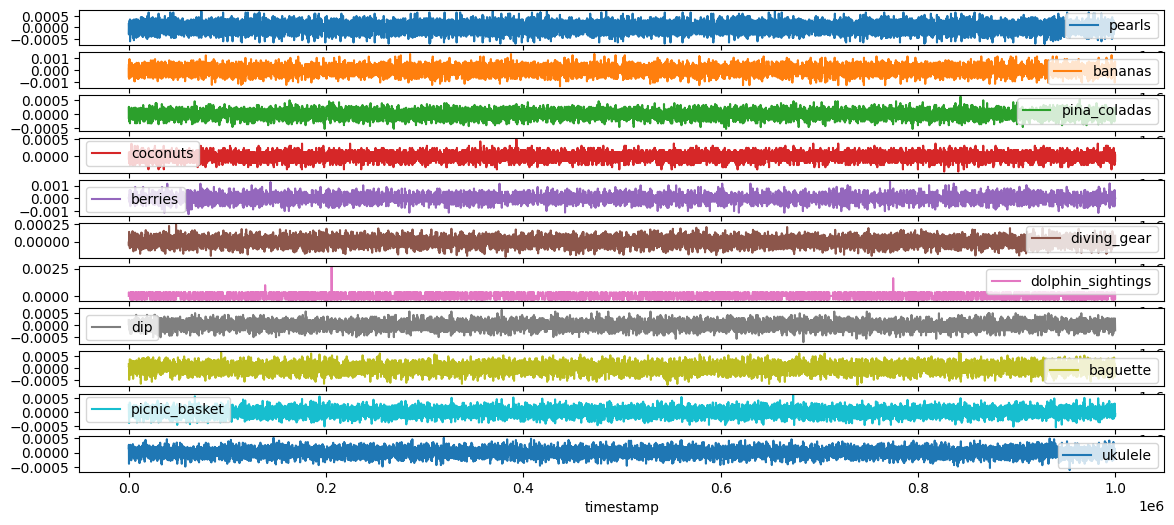

In [26]:
returns = np.log(df['mid_price']/ df['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

# Correlation Plots

array([[<Axes: xlabel='pearls', ylabel='pearls'>,
        <Axes: xlabel='bananas', ylabel='pearls'>,
        <Axes: xlabel='pina_coladas', ylabel='pearls'>,
        <Axes: xlabel='coconuts', ylabel='pearls'>,
        <Axes: xlabel='berries', ylabel='pearls'>,
        <Axes: xlabel='diving_gear', ylabel='pearls'>,
        <Axes: xlabel='dolphin_sightings', ylabel='pearls'>,
        <Axes: xlabel='dip', ylabel='pearls'>,
        <Axes: xlabel='baguette', ylabel='pearls'>,
        <Axes: xlabel='picnic_basket', ylabel='pearls'>,
        <Axes: xlabel='ukulele', ylabel='pearls'>],
       [<Axes: xlabel='pearls', ylabel='bananas'>,
        <Axes: xlabel='bananas', ylabel='bananas'>,
        <Axes: xlabel='pina_coladas', ylabel='bananas'>,
        <Axes: xlabel='coconuts', ylabel='bananas'>,
        <Axes: xlabel='berries', ylabel='bananas'>,
        <Axes: xlabel='diving_gear', ylabel='bananas'>,
        <Axes: xlabel='dolphin_sightings', ylabel='bananas'>,
        <Axes: xlabel='dip', ylab

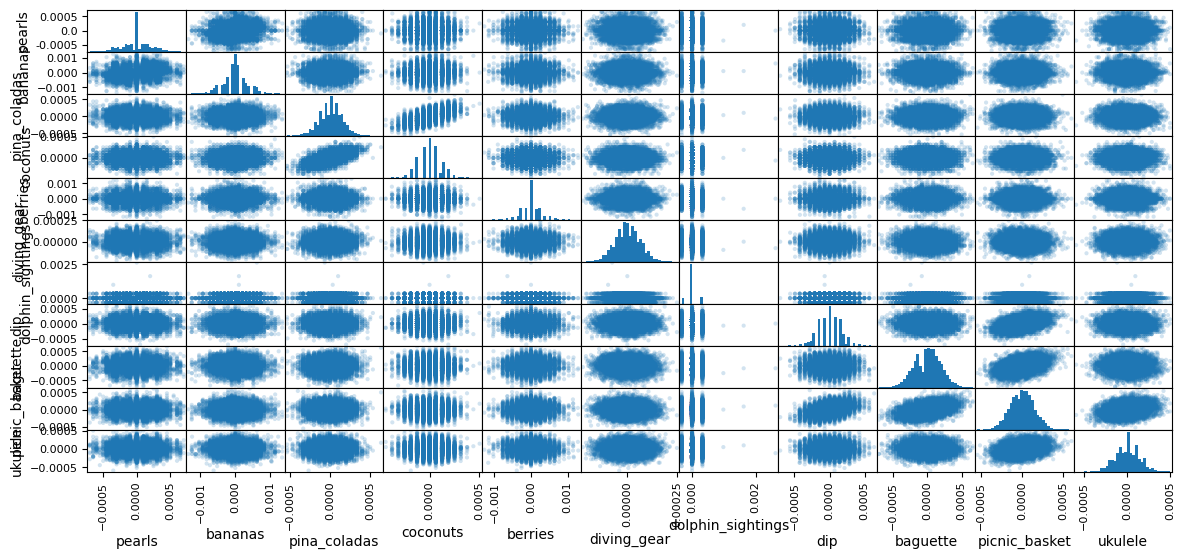

In [27]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

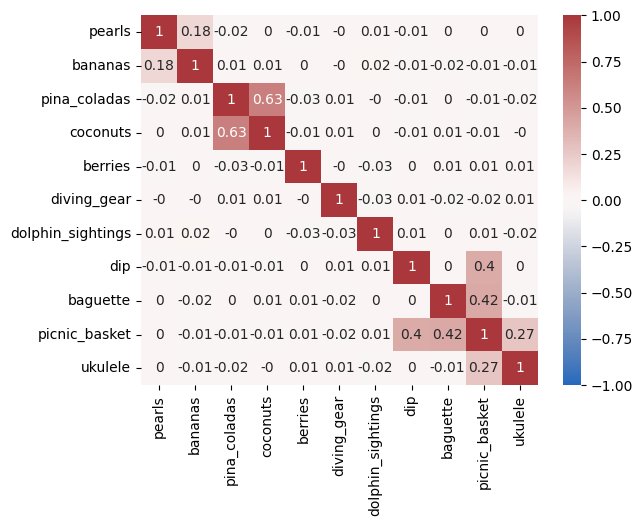

In [28]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

# Pairwise Scatter Plots

## Pearls vs Bananas

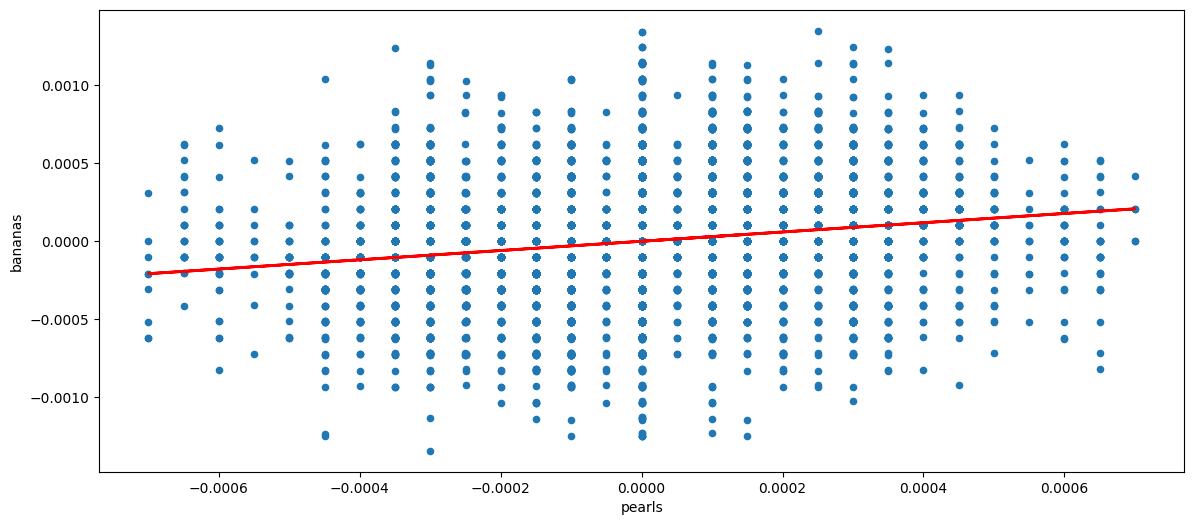

In [29]:
regression_pearls_bananas = np.polyfit(returns['pearls'], returns['bananas'], deg=1)

ax_PB = returns.plot(kind='scatter', x= 'pearls', y='bananas', figsize=(14,6))
ax_PB.plot(returns['pearls'], np.polyval(regression_pearls_bananas, returns['pearls']), 'r', lw=2)

In [30]:
returns.corr()

,pearls,bananas,pina_coladas,coconuts,berries,diving_gear,dolphin_sightings,dip,baguette,picnic_basket,ukulele
pearls,1.000000,0.183912,-0.019307,0.004314,-0.007917,-0.000263,0.008852,-0.009827,0.001735,0.001481,0.000406
bananas,0.183912,1.000000,0.008012,0.008313,0.002893,-0.003665,0.020716,-0.006161,-0.019665,-0.010034,-0.008625
pina_coladas,-0.019307,0.008012,1.000000,0.628836,-0.032240,0.012596,-0.002015,-0.005527,0.000232,-0.007557,-0.015813
coconuts,0.004314,0.008313,0.628836,1.000000,-0.011382,0.012563,0.004504,-0.005702,0.009766,-0.006903,-0.003834
berries,-0.007917,0.002893,-0.032240,-0.011382,1.000000,-0.002530,-0.028038,0.000637,0.005304,0.007077,0.010574
diving_gear,-0.000263,-0.003665,0.012596,0.012563,-0.002530,1.000000,-0.025095,0.009555,-0.023441,-0.021399,0.010121
dolphin_sightings,0.008852,0.020716,-0.002015,0.004504,-0.028038,-0.025095,1.000000,0.009613,0.000235,0.012006,-0.017768
dip,-0.009827,-0.006161,-0.005527,-0.005702,0.000637,0.009555,0.009613,1.000000,0.000872,0.401679,0.000049
baguette,0.001735,-0.019665,0.000232,0.009766,0.005304,-0.023441,0.000235,0.000872,1.000000,0.421230,-0.011675
picnic_basket,0.001481,-0.010034,-0.007557,-0.006903,0.007077,-0.021399,0.012006,0.401679,0.421230,1.000000,0.268162


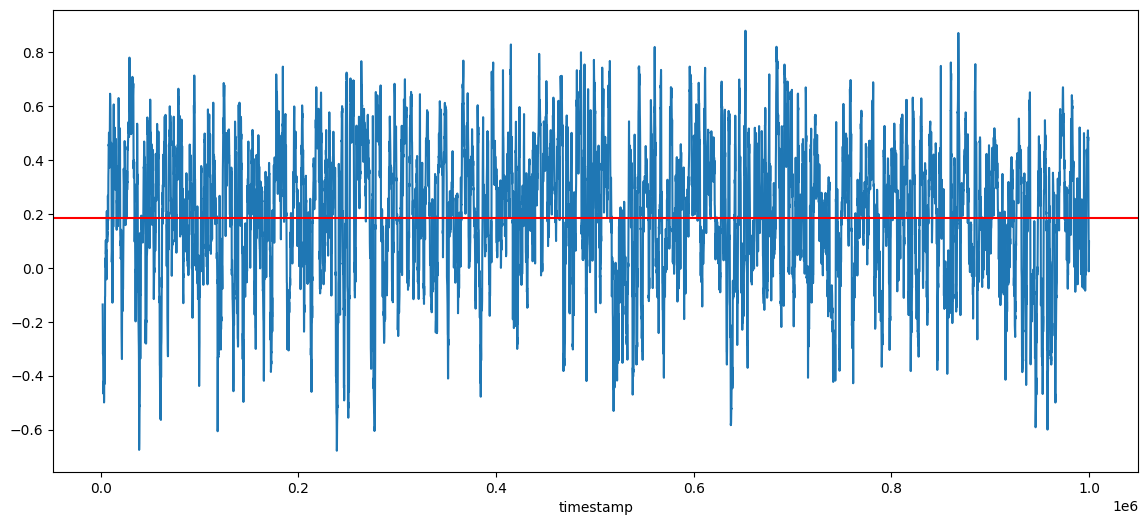

In [31]:
ax = returns['pearls'].rolling(window=20).corr(returns['bananas']).plot(figsize=(14,6))
ax.axhline(returns.corr().iloc[0,1], c='r')

## Coconuts vs Pina Coladas

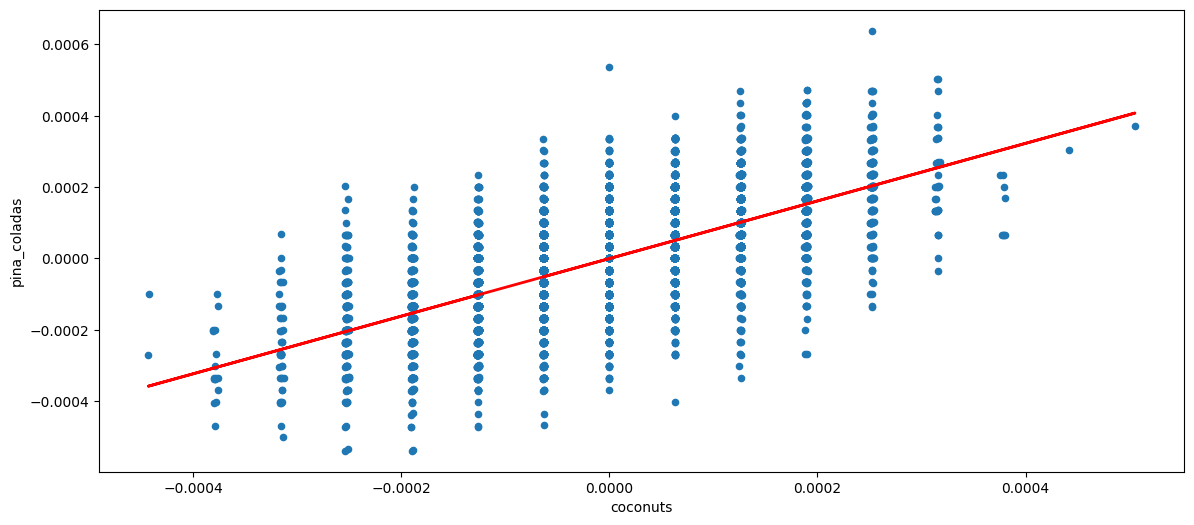

In [32]:
regression_coconuts_coladas = np.polyfit(returns['coconuts'], returns['pina_coladas'], deg=1)

ax_CPC = returns[['coconuts', 'pina_coladas']].plot(kind='scatter', x= 'coconuts', y='pina_coladas', figsize=(14,6))
ax_CPC.plot(returns['coconuts'], np.polyval(regression_coconuts_coladas, returns['coconuts']), 'r', lw=2)

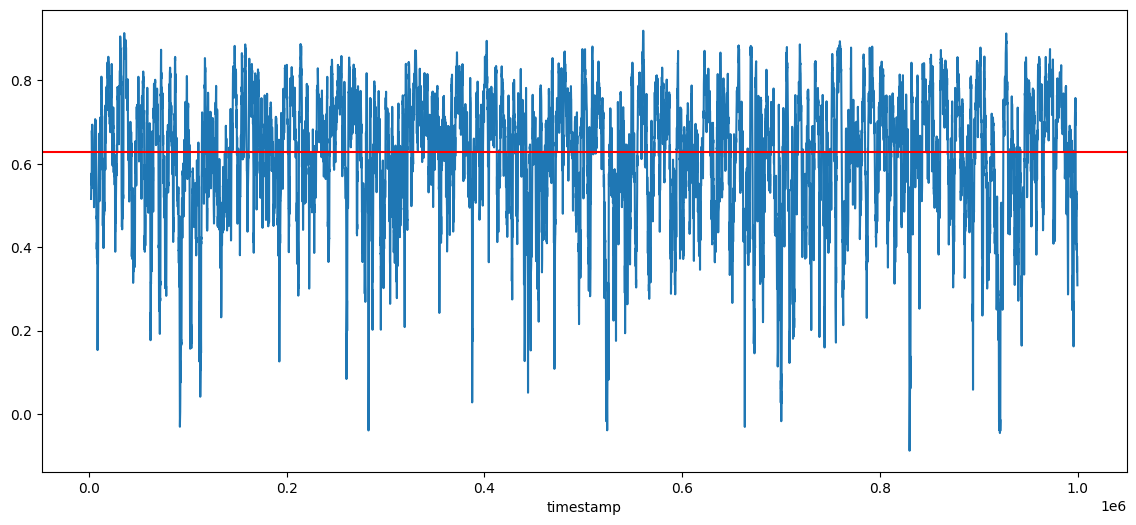

In [33]:
ax_CPC = returns['coconuts'].rolling(window=20).corr(returns['pina_coladas']).plot(figsize=(14,6))
ax_CPC.axhline(returns.corr().iloc[2,3], c='r')